In [5]:
from keras.models import load_model
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

class NN():
    def __init__(self):
        self.MODEL = load_model('Unet.h5')
        
    def imanalys(self, impath):
        #Get  and rocesing img, 
        img_inp = cv2.resize(cv2.imread(impath), (1920, 1024))
        img = cv2.resize(cv2.imread(impath, 0), (256, 256))
        img = img/255.
        img = np.array([img])

        #load image into traning model and get result
        img_pred = self.MODEL.predict(img)[0]
        img_pred = cv2.resize(img_pred, (1920, 1024))

        #Find good and bad cells contours
        cntr_good = measure.find_contours(img_pred[:,:,2], 0.6)
        cntr_bad = measure.find_contours(img_pred[:,:,1], 0.8)
        
        #Draw cells contours on orig img
        fig, ax = plt.subplots()
        ax.imshow(img_inp)

        for contour in cntr_good:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1.5, color="#00FFB6")
        for contour in cntr_bad:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1.5, color="#BD0000")

        ax.axis('image')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()
    
        

1/1 [==============================] - 0s 498ms/step


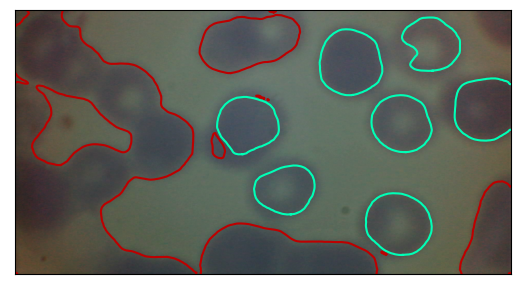

In [7]:
x = NN()
x.imanalys("E:\\shlak\\maskBlodDS\\data\\41.png")